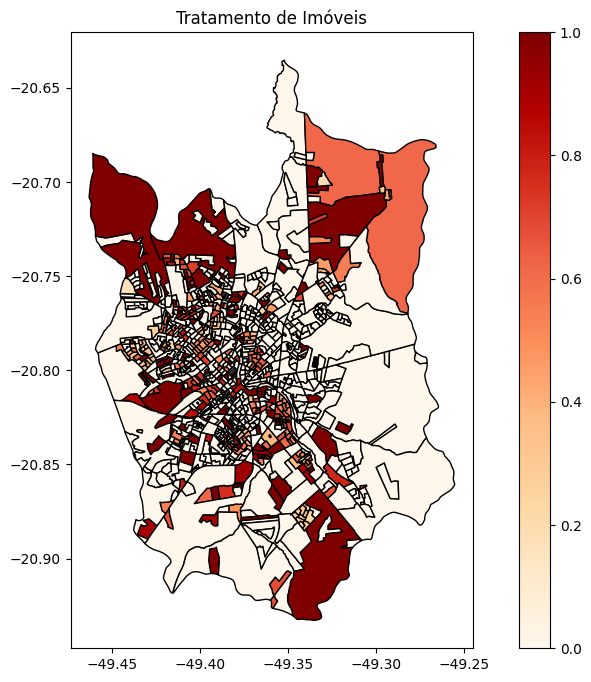

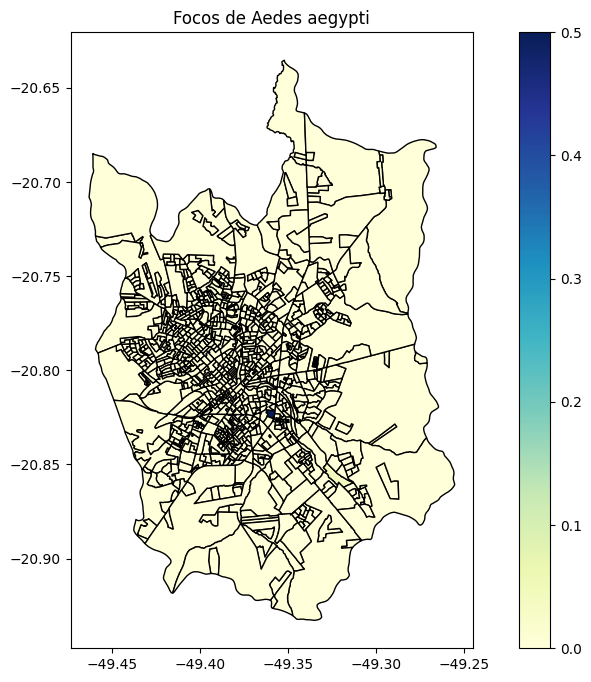

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Passo 1: Carregar os dados
df = pd.read_csv("C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/Sisaweb/dados_merged.csv")

# Passo 2: Converter 'geometry' para objetos geométricos
df['geometry'] = df['geometry'].apply(wkt.loads)

# Passo 3: Criar um GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Passo 4: Definir o sistema de referência de coordenadas (CRS)
gdf.crs = "EPSG:4326"

# Passo 5: Calcular a métrica de tratamento de imóveis
gdf['tratamento_imoveis'] = gdf.apply(
    lambda row: row['trabalhados'] / (row['trabalhados'] + row['nao_trabalhados'])
    if (row['trabalhados'] + row['nao_trabalhados']) > 0 else 0,
    axis=1
)

# Passo 6: Calcular a métrica de focos de Aedes aegypti
gdf['focos_aedes'] = gdf.apply(
    lambda row: row['im_aegypti'] / row['trabalhados']
    if row['trabalhados'] > 0 else 0,
    axis=1
)

# Passo 7: Criar o mapa de calor para tratamento de imóveis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='tratamento_imoveis', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('Tratamento de Imóveis')
plt.show()

# Passo 8: Criar o mapa de calor para focos de Aedes aegypti
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='focos_aedes', ax=ax, legend=True, cmap='YlGnBu', edgecolor='black')
ax.set_title('Focos de Aedes aegypti')
plt.show()


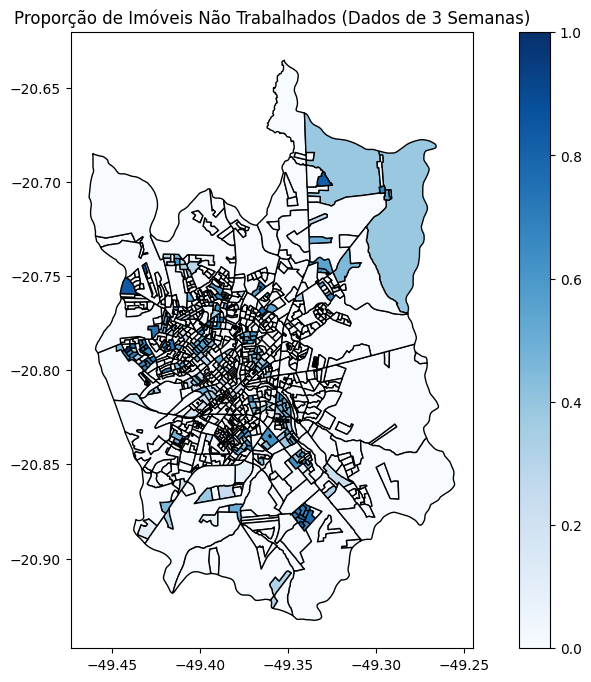

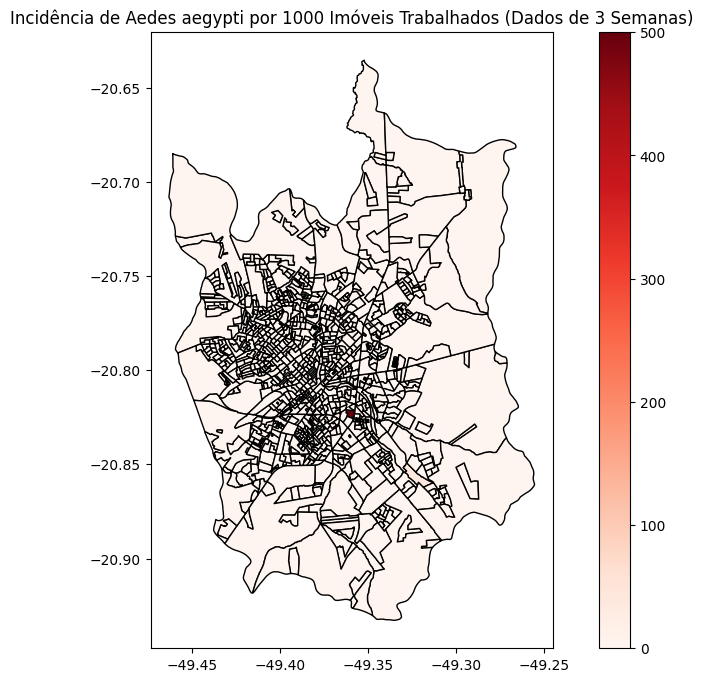

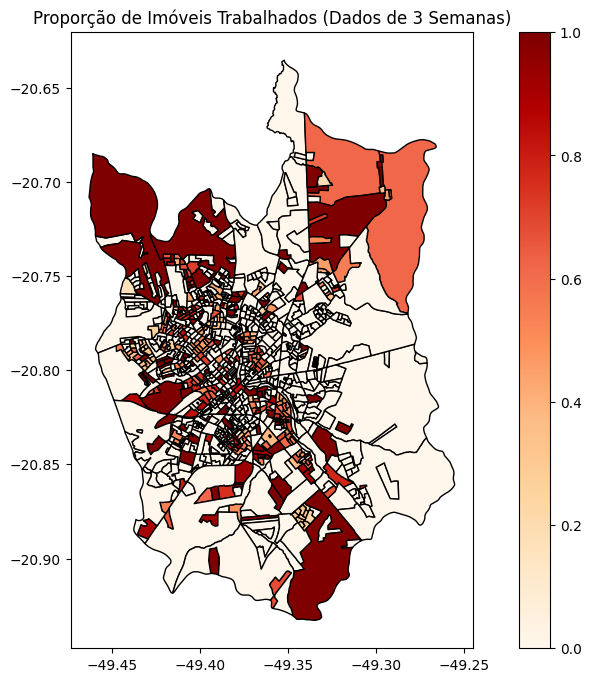

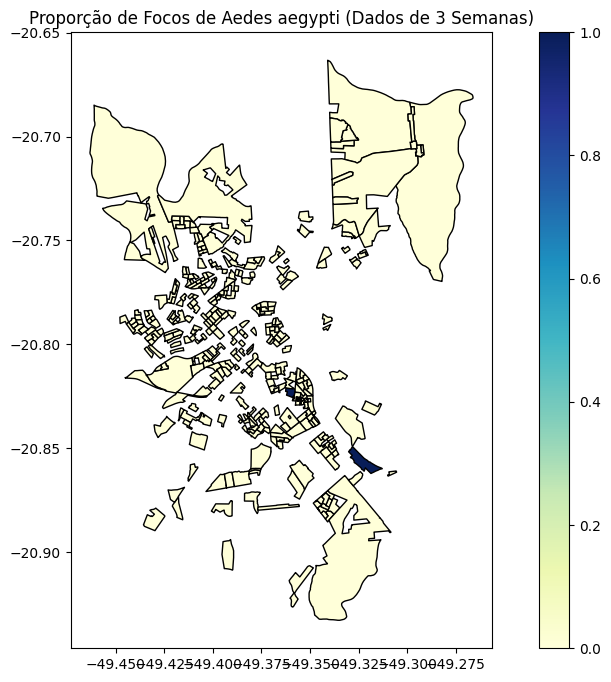

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

# Passo 1: Carregar os dados
df = pd.read_csv('dados_merged.csv')

# Passo 2: Converter 'geometry' para objetos geométricos
df['geometry'] = df['geometry'].apply(wkt.loads)

# Passo 3: Criar um GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Passo 4: Definir o sistema de referência de coordenadas (CRS)
gdf.crs = "EPSG:4326"

# Passo 5: Calcular a métrica de tratamento de imóveis (imóveis trabalhados)
gdf['tratamento_imoveis'] = gdf.apply(
    lambda row: row['trabalhados'] / (row['trabalhados'] + row['nao_trabalhados'])
    if (row['trabalhados'] + row['nao_trabalhados']) > 0 else 0,
    axis=1
)

# Passo 6: Calcular a métrica de imóveis não trabalhados
gdf['nao_trabalhados_ratio'] = gdf.apply(
    lambda row: row['nao_trabalhados'] / (row['trabalhados'] + row['nao_trabalhados'])
    if (row['trabalhados'] + row['nao_trabalhados']) > 0 else 0,
    axis=1
)

# Passo 7: Calcular a incidência de Aedes aegypti por 1000 imóveis trabalhados
gdf['incidencia_aedes'] = gdf.apply(
    lambda row: (row['im_aegypti'] / row['trabalhados']) * 1000
    if row['trabalhados'] > 0 else 0,
    axis=1
)

# Passo 8: Criar o mapa de calor para imóveis não trabalhados
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='nao_trabalhados_ratio', ax=ax, legend=True, cmap='Blues', edgecolor='black')
ax.set_title('Proporção de Imóveis Não Trabalhados (Dados de 3 Semanas)')
plt.show()

# Passo 9: Criar o mapa de calor para incidência de Aedes aegypti
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='incidencia_aedes', ax=ax, legend=True, cmap='Reds', edgecolor='black')
ax.set_title('Incidência de Aedes aegypti por 1000 Imóveis Trabalhados (Dados de 3 Semanas)')
plt.show()

# Passo 10: Atualizar o mapa de tratamento de imóveis com o título atualizado
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='tratamento_imoveis', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('Proporção de Imóveis Trabalhados (Dados de 3 Semanas)')
plt.show()
